This exploratory data analysis (EDA) was done using the TMDB 5000 Movie Dataset found at: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata. Specifically, this was done on the tmdb_5000_movies.csv file. 

Popularity of a movie is calculated based on:
 - Number of votes for the day
 - Number of views for the day
 - Number of users who marked it as a "favourite" for the day
 - Number of users who added it to their "watchlist" for the day
 - Release date
 - Number of total votes
 - Previous days score
 
For more info see https://developers.themoviedb.org/3/getting-started/popularity

In [58]:
import re
from io import StringIO 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import chisquare

# set seaborn styles
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# use same dataframe throughout notebook
filename = 'tmdb_5000_movies.csv'
df_tmdb = pd.read_csv(filename)

In [59]:
print("\nSample of tmdb_5000_movies.csv: \n\n", df_tmdb.head)


Sample of tmdb_5000_movies.csv: 

 <bound method NDFrame.head of          budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                         

In [62]:
# Show basic stats: 
#  - percentiles, mean, sd, min, max and format to show 2 dec places
print("\nStatistics for titles.ratings.tsv: \n\n", df_tmdb.describe().apply(lambda s: s.apply('{0:.2f}'.format)), "\n\n")


Statistics for titles.ratings.tsv: 

              budget         id popularity        revenue  runtime  \
count       4803.00    4803.00    4803.00        4803.00  4801.00   
mean    29045039.88   57165.48      21.49    82260638.65   106.88   
std     40722391.26   88694.61      31.82   162857100.94    22.61   
min            0.00       5.00       0.00           0.00     0.00   
25%       790000.00    9014.50       4.67           0.00    94.00   
50%     15000000.00   14629.00      12.92    19170001.00   103.00   
75%     40000000.00   58610.50      28.31    92917187.00   118.00   
max    380000000.00  459488.00     875.58  2787965087.00   338.00   

      vote_average vote_count  
count      4803.00    4803.00  
mean          6.09     690.22  
std           1.19    1234.59  
min           0.00       0.00  
25%           5.60      54.00  
50%           6.20     235.00  
75%           6.80     737.00  
max          10.00   13752.00   




In [66]:
# find top 20 movies by num of ratings
df_tmdb.nlargest(20, 'vote_count')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867
287,100000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 37, ""name...",http://unchainedmovie.com/,68718,"[{""id"": 801, ""name"": ""bounty hunter""}, {""id"": ...",en,Django Unchained,"With the help of a German bounty hunter, a fre...",82.121691,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-12-25,425368238,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"Life, liberty and the pursuit of vengeance.",Django Unchained,7.8,10099
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""m

In [49]:
# This shows we are missing some non-numerical data like homepage, overview, tagline
# This data is also missing 1 release date and 2 runtimes. Overall, pretty good.
print("Count null vals with df.insnull().sum() :\n\n", df_tmdb.isnull().sum())

Count null vals with df.insnull().sum() :

 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64



Basic Correlation Matrix
                 budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.089377    0.505414  0.730823  0.269851   
id           -0.089377  1.000000    0.031202 -0.050425 -0.153536   
popularity    0.505414  0.031202    1.000000  0.644724  0.225502   
revenue       0.730823 -0.050425    0.644724  1.000000  0.251093   
runtime       0.269851 -0.153536    0.225502  0.251093  1.000000   
vote_average  0.093146 -0.270595    0.273952  0.197150  0.375046   
vote_count    0.593180 -0.004128    0.778130  0.781487  0.271944   

              vote_average  vote_count  
budget            0.093146    0.593180  
id               -0.270595   -0.004128  
popularity        0.273952    0.778130  
revenue           0.197150    0.781487  
runtime           0.375046    0.271944  
vote_average      1.000000    0.312997  
vote_count        0.312997    1.000000  


SeaBorn Correlation Matrix as Heatmap


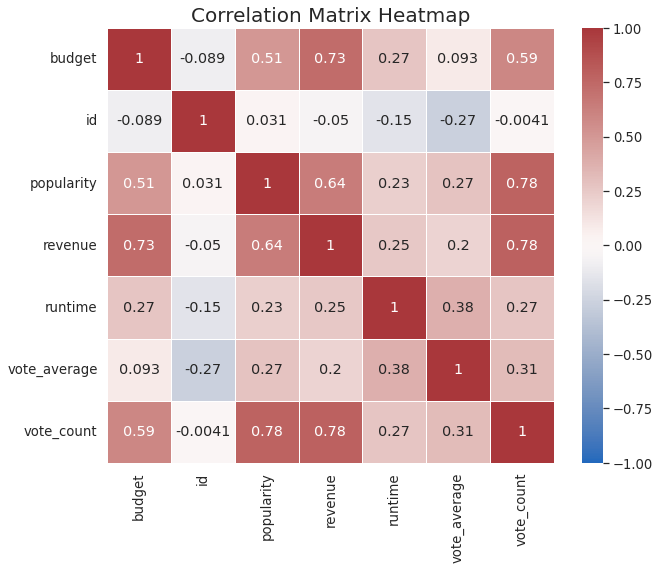

In [50]:
# Print basic correlation matrix
matrix = df_tmdb.corr()
print("\nBasic Correlation Matrix\n", matrix)

# Used https://datagy.io/python-correlation-matrix/ as a reference on 11/26/2022
print("\n\nSeaBorn Correlation Matrix as Heatmap")
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', linewidths=.5, ax=ax) 
plt.title("Correlation Matrix Heatmap", fontsize =20)
plt.show()

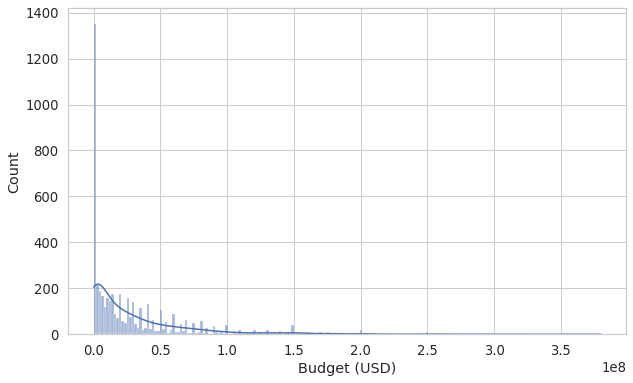

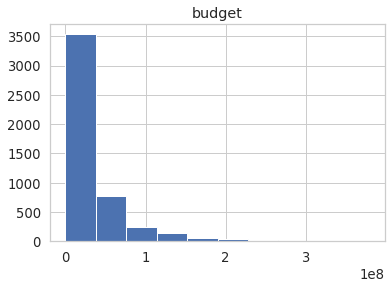

In [64]:
# Create 2 histograms for budget
fig = plt.figure(figsize=(10, 6))

# Nice histogram of movie budget
sns.histplot(data=df_tmdb, x='budget', bins=200, kde=True)
plt.xlabel('Budget (USD)')
plt.ylabel('Count')
plt.show()

# basic histogram of movie budget
# both histograms show lots of low budget movies on the list
df_tmdb.hist(column='budget')
plt.show()

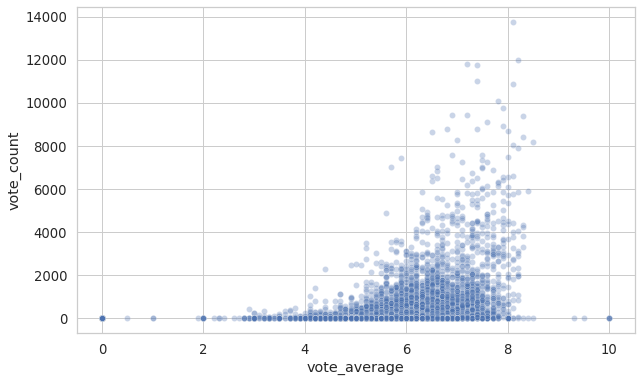

In [65]:
# Scatter plot of vote_average vs vote_count
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tmdb, x='vote_average', y='vote_count', alpha=0.3)
plt.show()

<AxesSubplot:xlabel='budget', ylabel='vote_average'>

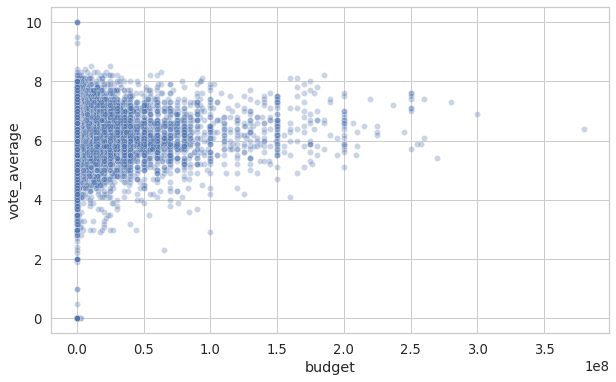

In [52]:
# Scatter plot of budget vs vote_average
# very little correlation between budget and user rating. Pretty crazy.
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tmdb, x='budget', y='vote_average', alpha=0.3)

<AxesSubplot:xlabel='budget', ylabel='vote_count'>

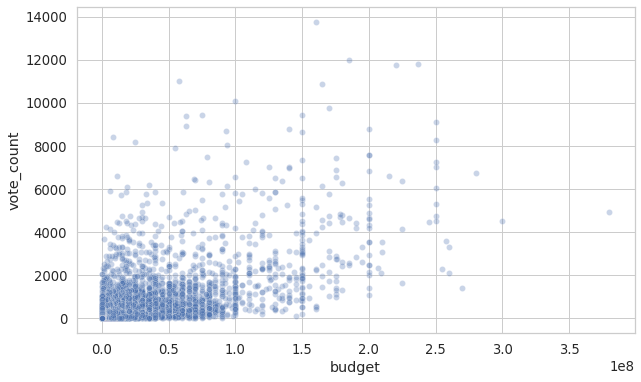

In [53]:
# Scatter plot of budget vs vote_count
# decent correlation. You do get more views with a higher budget.
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tmdb, x='budget', y='vote_count', alpha=0.3)

<AxesSubplot:xlabel='vote_average', ylabel='revenue'>

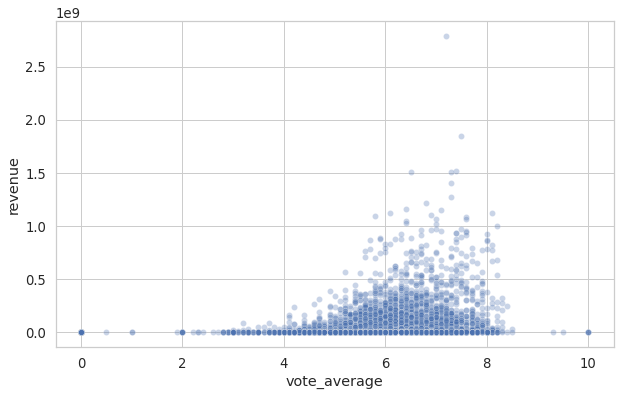

In [54]:
# Scatter plot of vote_average vs revenue
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tmdb, x='vote_average', y='revenue', alpha=0.3)

<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

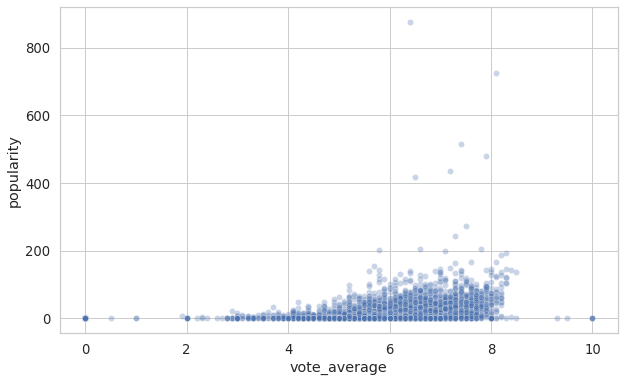

In [55]:
# Scatter plot of vote_average vs popularity
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tmdb, x='vote_average', y='popularity', alpha=0.3)

<AxesSubplot:xlabel='vote_count', ylabel='popularity'>

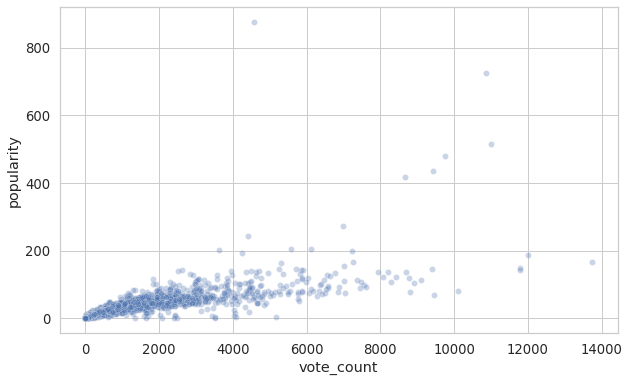

In [56]:
# Scatter plot of vote_count vs popularity
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tmdb, x='vote_count', y='popularity', alpha=0.3)